In [6]:
from tensorflow import keras
(train_input, train_target), (test_input, tes_target) =\
keras.datasets.imdb.load_data(num_words=300)

In [7]:
train_input.shape

(25000,)

In [8]:
print(train_input[0]) #2는 범위에 없는 단어들

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 2, 284, 5, 150, 4, 172, 112, 167, 2, 2, 2, 39, 4, 172, 2, 2, 17, 2, 38, 13, 2, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 2, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 2, 12, 8, 2, 8, 106, 5, 4, 2, 2, 16, 2, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 2, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 7, 4, 2, 2, 13, 104, 88, 4, 2, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 2, 26, 2, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [9]:
train_target[:20]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1],
      dtype=int64)

In [10]:
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target =\
train_test_split(train_input, train_target, test_size=0.2)

In [11]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [12]:
train_seq = pad_sequences(train_input, maxlen=100)

In [13]:
train_seq.shape

(20000, 100)

In [14]:
train_seq[0]

array([ 18,   4,  78,   2,   5, 229,  13,   2,   4,   2,  16,  66,  11,
         2,  19,  45,   2,   4, 156,  71,   2,  52,  33,   2,  68, 105,
         8, 113,  21,  11,   4, 130,   4, 155,  15,  16,  66,   2,  16,
         6,   2, 229,   8,   2,  32,   4,   2, 295,  13,  62,   2,   2,
        24,   8, 106,  14,   2,   2,   6,   2,   2,   2,  40,  13, 244,
         5,  80, 106, 285,  29,   9,   2,  11,  60,  48,   4,   2,   2,
        26, 247,   2,  14,   9, 103,   2,   6,   2,  55,  78,  20,  18,
        14, 284,  15, 280,   2,  89,   8,   2,   2])

In [15]:
train_input[0][-10:]

[18, 14, 284, 15, 280, 2, 89, 8, 2, 2]

In [16]:
train_seq[10]

array([  2,   2, 250, 261,  59,   2,  41, 107,   2,  73,  21, 121,  26,
        25,   5,  79,   2,   2,  72,   2,  31,   2, 161,   2,  18,  15,
         2,  21,  13, 119,   4,   2,   2,   9,   2,   5,   6,   2,   2,
         9,   6,   2,  10,  10,   4,   2,   7,   4,  20, 266,  33,   4,
       130,  19,   2,   2,   4, 228,   5,   2,  31,   7,   4,  91,   2,
         2,   2, 126,   2,   5,   2,  31,   7,   4,  91,   2,   2,  34,
         2,   5,   2,  11,  12,  36,   2,   2,   2,   5,   2,  12,   9,
         2,   8,  30,   2,   5, 296, 174,   5, 174])

In [17]:
val_seq = pad_sequences(val_input, maxlen=100)

In [18]:
model = keras.Sequential()

In [19]:
model.add(keras.layers.SimpleRNN(8, input_shape=(100, 300))) # 100단어를 300개의 사전 안에서 학습시켜줘 !
model.add(keras.layers.Dense(1, activation='sigmoid'))

C:\Users\2-14\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
train_oh = keras.utils.to_categorical(train_seq)

In [21]:
train_oh.shape

(20000, 100, 300)

In [22]:
train_oh[0][0][:] #단어의 위치만 1, 나머지는 0으로 변환

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [23]:
val_oh = keras.utils.to_categorical(val_seq) #원핫인코딩

In [24]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 8)                   │           2,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,481 (9.69 KB)

 Trainable params: 2,481 (9.69 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001) #공을 굴리는 방법 (경사하강법 어쩌구...)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
#끊는거
cp_cb = keras.callbacks.ModelCheckpoint('best_rnn.keras', save_best_only=True) #세베온True는 젤 조은거 하나만 저장해 ~!
es_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(train_oh, train_target, epochs=100, batch_size=64, validation_data=(val_oh, val_target), callbacks=[cp_cb, es_cb]) #확률적 경사하강법에서 배치사이즈 지정하면 OO개씩 빼와서 학습

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.5388 - loss: 0.6878 - val_accuracy: 0.5256 - val_loss: 0.6889
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5431 - loss: 0.6868 - val_accuracy: 0.5248 - val_loss: 0.6886
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5444 - loss: 0.6858 - val_accuracy: 0.5272 - val_loss: 0.6884
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5528 - loss: 0.6847 - val_accuracy: 0.5314 - val_loss: 0.6882
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5524 - loss: 0.6834 - val_accuracy: 0.5332 - val_loss: 0.6874
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5599 - loss: 0.6809 - val_accuracy: 0.5440 - val_loss: 0.6837
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5738 - loss: 0.6764 - val_accuracy: 0.5778 - val_loss: 0.6741
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6051 - loss: 0.6660 - 

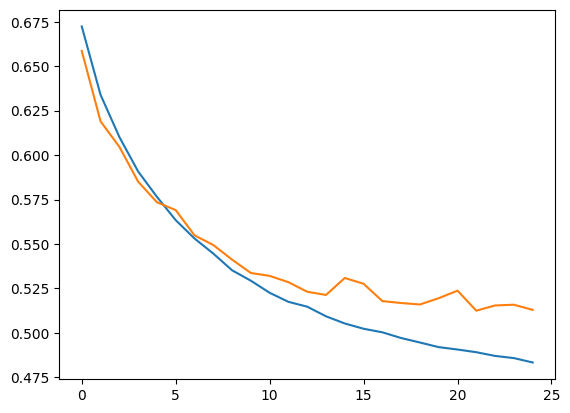

In [35]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [36]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(300, 16, input_length=100)
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

SyntaxError: '(' was never closed (3234682063.py, line 2)

In [37]:
model2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 100, 16)             │           4,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 8)                   │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,020 (39.14 KB)

 Trainable params: 5,009 (19.57 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,011 (19.58 KB)

In [38]:
rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

cp_cb = keras.callbacks.ModelCheckpoint('best_rnn_emb.keras', save_best_only=True)
es_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[cp_cb, es_cb]) #확률적 경사하강법에서 배치사이즈 지정하면 OO개씩 빼와서 학습

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.7745 - loss: 0.4844 - val_accuracy: 0.7396 - val_loss: 0.5232
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7723 - loss: 0.4849 - val_accuracy: 0.7496 - val_loss: 0.5170
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7757 - loss: 0.4830 - val_accuracy: 0.7522 - val_loss: 0.5101
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7778 - loss: 0.4790 - val_accuracy: 0.7362 - val_loss: 0.5316
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7740 - loss: 0.4814 - val_accuracy: 0.7488 - val_loss: 0.5158
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3586s 11s/step - accuracy: 0.7750 - loss: 0.4818 - val_accuracy: 0.7480 - val_loss: 0.5183


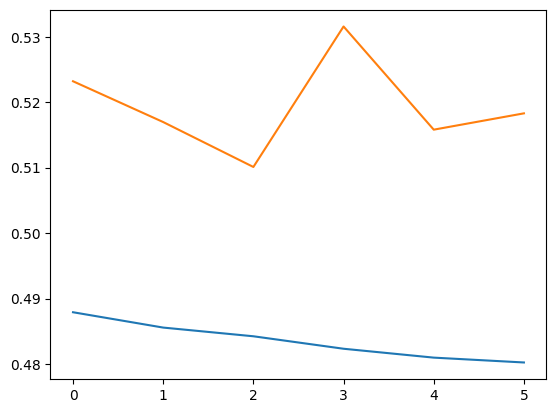

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()